In [1]:
import pandas as pd

In [65]:
population = pd.read_csv('population_total.csv').set_index('country').fillna(method = 'ffill', axis = 1).reset_index()
life_exp = pd.read_csv('life_expectancy_years.csv').set_index('country').fillna(method = 'ffill', axis = 1).reset_index()
gnp = pd.read_csv('ny_gnp_pcap_pp_cd.csv').set_index('country').fillna(method = 'ffill', axis = 1).reset_index()
    

In [157]:
gnp.columns

Index(['country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [82]:
df1 = population.melt(id_vars='country', var_name='year').rename(columns={"value": "population"}).set_index(['country', 'year'])
df2 = life_exp.melt(id_vars='country', var_name='year').rename(columns={"value": "life_exp"}).set_index(['country', 'year'])
df3 = gnp.melt(id_vars='country', var_name='year').rename(columns={"value": "gnp"}).set_index(['country', 'year'])

In [156]:
print(df1.shape, df2.shape, df3.shape)

(58695, 1) (56287, 1) (5580, 1)


In [86]:
df = df1.join(df2, on=['country', 'year'], how='outer', sort=True).join(df3, on=['country', 'year'], how='outer', sort=True)
df

population  life_exp  gnp
country     year                           
Afghanistan 1800     3280000      28.2  NaN
            1801     3280000      28.2  NaN
            1802     3280000      28.2  NaN
            1803     3280000      28.2  NaN
            1804     3280000      28.2  NaN
...                      ...       ...  ...
Zimbabwe    2096    30900000      75.1  NaN
            2097    31000000      75.3  NaN
            2098    31000000      75.4  NaN
            2099    31000000      75.5  NaN
            2100    31000000      75.7  NaN

[58695 rows x 3 columns]

In [114]:
idx = pd.MultiIndex.set_levels()
idx
#pd.DataFrame(index = pd.MultiIndex.set_names(names=['country', 'year'], inplace=True))

#test.join(df1)

pandas.core.indexes.multi.MultiIndex

In [167]:
df1.index[300:400]

MultiIndex([(                          'Mali', '1801'),
            (                         'Malta', '1801'),
            (              'Marshall Islands', '1801'),
            (                    'Mauritania', '1801'),
            (                     'Mauritius', '1801'),
            (                        'Mexico', '1801'),
            (         'Micronesia, Fed. Sts.', '1801'),
            (                       'Moldova', '1801'),
            (                        'Monaco', '1801'),
            (                      'Mongolia', '1801'),
            (                    'Montenegro', '1801'),
            (                       'Morocco', '1801'),
            (                    'Mozambique', '1801'),
            (                       'Myanmar', '1801'),
            (                       'Namibia', '1801'),
            (                         'Nauru', '1801'),
            (                         'Nepal', '1801'),
            (                   'Netherlands', '

In [136]:
def load_data():
    dfs= []
    for file in ['population_total.csv', 'life_expectancy_years.csv', 'ny_gnp_pcap_pp_cd.csv']:
        dataset = pd.read_csv(file).fillna(method = 'ffill', axis = 0).melt(id_vars='country', var_name='year').rename(columns={"value": file})#.set_index(['country', 'year'])
        dfs.append(dataset)
    df = pd.DataFrame(columns=['country','year'])
    df = pd.merge(dfs[0], dfs[1], how="outer", on=['country','year'])
    dff = pd.merge(df, dfs[2], how="outer", on=['country','year'])
    return dff.rename(columns={"population_total.csv": "population", 'life_expectancy_years.csv':'life_exp', 'ny_gnp_pcap_pp_cd.csv':'gnp'})

In [137]:
df = load_data()
df

,country,year,population,life_exp,gnp
0,Afghanistan,1800,3280000,28.2,NaN
1,Albania,1800,400000,35.4,NaN
2,Algeria,1800,2500000,28.8,NaN
3,Andorra,1800,2650,28.8,NaN
4,Angola,1800,1570000,27.0,NaN
...,...,...,...,...,...
58690,Venezuela,2100,34200000,87.3,NaN
58691,Vietnam,2100,97400000,85.3,NaN
58692,Yemen,2100,53200000,78.4,NaN
58693,Zambia,2100,81500000,78.1,NaN


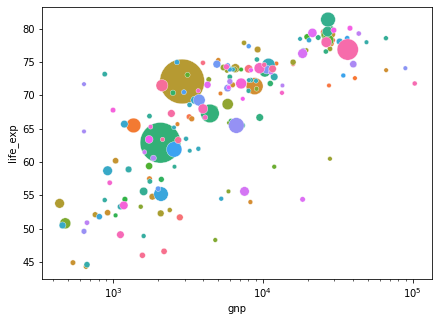

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(7, 5))
ax.set(xscale="log")

bubble = sns.scatterplot(data=df[df['year']=='2000'], x="gnp", y="life_exp", size="population", ax=ax,legend=False, sizes=(20, 2000), hue='country')



In [155]:
type(df['year'][0])

str

In [164]:
year = 2000
multiselect = ['Argentina', 'Armenia']
df.loc[(df.year==str(year)) & (df.country.isin(multiselect))]

,country,year,population,life_exp,gnp
39006,Argentina,2000,36900000,74.2,11300.0
39007,Armenia,2000,3070000,72.3,2740.0
